<a href="https://colab.research.google.com/github/alharidt16/text-Analysis/blob/main/UAS_TEXT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Akhir Semester Mata Kuliah Text Analysis
- Nama : Al Haridt Mahmudi
- NIM  : 2008108010004

## Get Dataset
Data yang akan digunakan adalah komentar atau review dari pengguna aplikasi Threads

In [1]:
!pip install google_play_scraper

In [2]:
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [19]:
result = reviews_all(
        'com.instagram.barcelona',
        sleep_milliseconds=0,
        lang='id',
        country='id',
        sort=Sort.NEWEST
    )

threads = pd.DataFrame.from_records(result)
threads = threads[['at','userName' ,'content', 'score' ]]

In [20]:
threads

,at,userName,content,score
0,2023-12-14 15:39:20,Ribout Rousdy,sementara,3
1,2023-12-06 01:17:41,Ahmad Hariyadi,Bagus,5
2,2023-11-22 06:04:44,Pieters Revivalist,Mantab,5
3,2023-11-22 04:48:18,Kin Kin,Kenapa threads limit terus,5
4,2023-11-21 13:27:31,Hamzan Rodi,susah,3
...,...,...,...,...
5307,2023-07-05 23:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5
5308,2023-07-05 23:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5
5309,2023-07-05 23:10:35,Rofiq sa'bani,Hello bruh,5
5310,2023-07-05 23:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4


In [21]:
threads['at'] = pd.to_datetime(threads['at'])

# mengambil data dari tanggal 01-01-2023
data_review_threads= threads

In [22]:
data_review_threads

,at,userName,content,score
0,2023-12-14 15:39:20,Ribout Rousdy,sementara,3
1,2023-12-06 01:17:41,Ahmad Hariyadi,Bagus,5
2,2023-11-22 06:04:44,Pieters Revivalist,Mantab,5
3,2023-11-22 04:48:18,Kin Kin,Kenapa threads limit terus,5
4,2023-11-21 13:27:31,Hamzan Rodi,susah,3
...,...,...,...,...
5307,2023-07-05 23:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5
5308,2023-07-05 23:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5
5309,2023-07-05 23:10:35,Rofiq sa'bani,Hello bruh,5
5310,2023-07-05 23:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4


## Text PreProcessing

In [23]:
!pip install nltk
!pip install sastrawi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


### Case with python with orbit data


In [25]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import re
import nltk

nltk.download('punkt')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def stemmerSastrawi(text):
    return stemmer.stem(text)

def stopwordSastrawi(text):
    return stopword.remove(text)

def regex(text):
    text = text.lower()
    text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = text.strip() #menghilangkan enter, tab, dll
    return text

def ka_handling(text):
    tokens = text.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))

def addt_stop_word(sentence):
    words = word_tokenize(sentence)
    return ''.join(' '.join(w for w in words if not w.lower() in stop_words))

ka = pd.read_csv('kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

stop_words = {'dan', 'di', 'ini',  'USER', 'User'}


def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    preproc = list(map(stemmerSastrawi, tqdm(preproc)))
    preproc = list(map(stopwordSastrawi, tqdm(preproc)))
    preproc = list(map(addt_stop_word, tqdm(preproc)))
    return preproc

data_review_threads['contentp'] = data_review_threads['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
data_review_threads['contentp_clean'] = all_preproc(data_review_threads['contentp'])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 5312/5312 [00:00<00:00, 7069.60it/s]


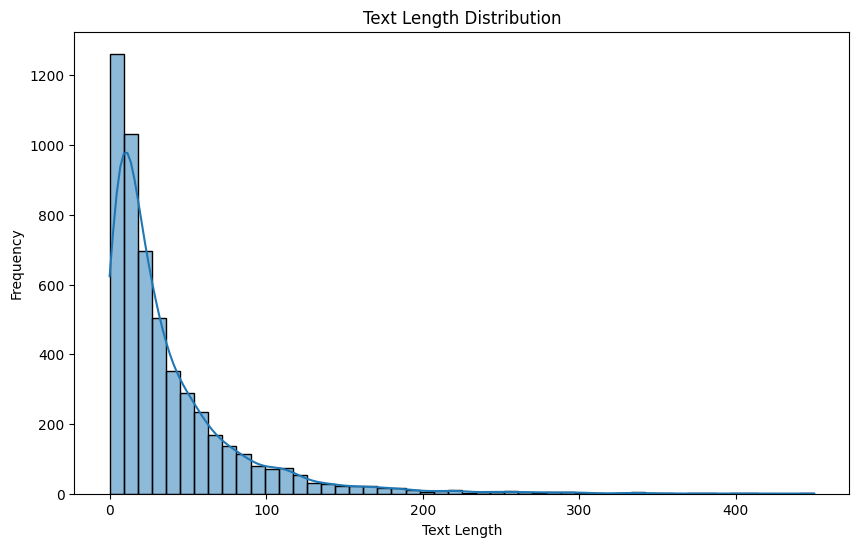

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

data_review_threads['text_length'] = data_review_threads['contentp_clean'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=data_review_threads, x='text_length', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

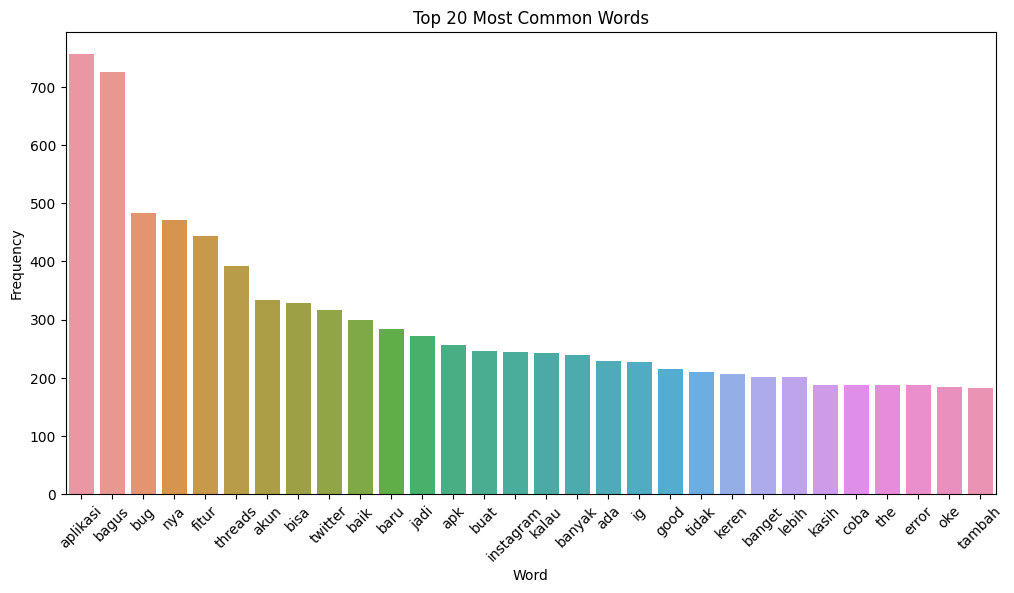

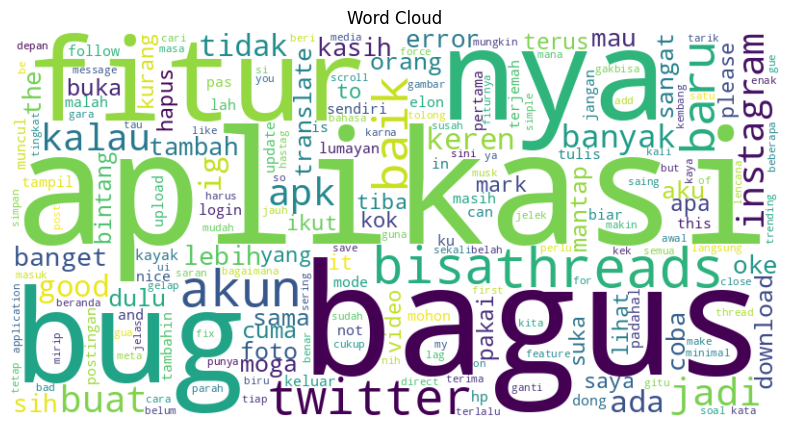

In [28]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize and count word occurrences
word_counts = Counter(word_tokenize(' '.join(data_review_threads['contentp_clean'])))
most_common_words = word_counts.most_common(30)  # Get the top 30 most common words

# Plot a bar chart for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [29]:
data_review_threads

,at,userName,content,score,contentp,contentp_clean,text_length
0,2023-12-14 15:39:20,Ribout Rousdy,sementara,3,sementara,,0
1,2023-12-06 01:17:41,Ahmad Hariyadi,Bagus,5,bagus,bagus,5
2,2023-11-22 06:04:44,Pieters Revivalist,Mantab,5,mantab,mantap,6
3,2023-11-22 04:48:18,Kin Kin,Kenapa threads limit terus,5,kenapa threads limit terus,threads limit terus,19
4,2023-11-21 13:27:31,Hamzan Rodi,susah,3,susah,susah,5
...,...,...,...,...,...,...,...
5307,2023-07-05 23:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5,,,0
5308,2023-07-05 23:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5,hiii aku pengguna tercepat,hiii aku cepat,14
5309,2023-07-05 23:10:35,Rofiq sa'bani,Hello bruh,5,hello bruh,hello bruh,10
5310,2023-07-05 23:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4,baru mencobanya meta sedang berusaha bersaing ...,baru coba meta sedang usaha saing twitter micr...,151


In [31]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positif"
    elif rating == 3:
        return "Netral"
    elif (rating == 2) or (rating == 1):
        return "Negatif"
# Add sentiments to the data
data_review_threads["label"] = data_review_threads["score"].apply(sentiments)
data_review_threads

,at,userName,content,score,contentp,contentp_clean,text_length,label
0,2023-12-14 15:39:20,Ribout Rousdy,sementara,3,sementara,,0,Netral
1,2023-12-06 01:17:41,Ahmad Hariyadi,Bagus,5,bagus,bagus,5,Positif
2,2023-11-22 06:04:44,Pieters Revivalist,Mantab,5,mantab,mantap,6,Positif
3,2023-11-22 04:48:18,Kin Kin,Kenapa threads limit terus,5,kenapa threads limit terus,threads limit terus,19,Positif
4,2023-11-21 13:27:31,Hamzan Rodi,susah,3,susah,susah,5,Netral
...,...,...,...,...,...,...,...,...
5307,2023-07-05 23:18:22,Itha Naibaho,👍🏻👍🏻👍🏻,5,,,0,Positif
5308,2023-07-05 23:10:58,Mhd Yudha,Hiii. Aku pengguna tercepat,5,hiii aku pengguna tercepat,hiii aku cepat,14,Positif
5309,2023-07-05 23:10:35,Rofiq sa'bani,Hello bruh,5,hello bruh,hello bruh,10,Positif
5310,2023-07-05 23:06:55,Mas'ud As'ad,"Baru mencobanya, Meta sedang berusaha bersaing...",4,baru mencobanya meta sedang berusaha bersaing ...,baru coba meta sedang usaha saing twitter micr...,151,Positif


In [32]:
data_review_threads.label.value_counts()

Positif    3329
Negatif    1447
Netral      536
Name: label, dtype: int64